In [13]:
import os, numpy as np, matplotlib.pyplot as plt
folder = "/content/final" # folder containing the data

In [14]:
import zipfile

with zipfile.ZipFile("/content/sample_data/fashion-minst.zip", "r") as zip_ref:
     zip_ref.extractall(".")

In [15]:


def load_data(X, y):
    for f in os.listdir(folder):
        for file in os.listdir(f"{folder}/{f}"):
            img = plt.imread(f"{folder}/{f}/{file}")
            X.append(img)

           

            label = [0] * 10
            label[int(f)] = 1 
            y.append(label)

        print(f"Loaded {f} class")

X, y = [], []
load_data(X, y)


X = np.array(X)
y = np.array(y)
print("Before reshaping")
print(X.shape, y.shape)
print(X[0], y[0])

X = X[:, :,:, 0] 
X = X.reshape(X.shape[0], X.shape[1]*X.shape[2])
print("After reshaping")
print(X.shape, y.shape)
print(X[0], y[0])

Loaded 1 class
Loaded 9 class
Loaded 3 class
Loaded 4 class
Loaded 0 class
Loaded 7 class
Loaded 6 class
Loaded 5 class
Loaded 2 class
Loaded 8 class
Before reshaping
(60000, 28, 28, 4) (60000, 10)
[[[0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  ...
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]]

 [[0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  ...
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]]

 [[0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  ...
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]]

 ...

 [[0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  ...
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]]

 [[0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  ...
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]]

 [[0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  ...
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]]] [0 1 0 0 0 0 0 0 0 0]
After reshaping
(60000, 784) (60000, 10)
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.407

In [26]:
class NN:
    def __init__(self, input_neurons, hidden_neurons, output_neurons, learning_rate, epochs):
        """
        Class Definition

        We use a class because it is easy to visualize the process of training a neural network
        It's also easier to resuse and repurpose depending on the task at hand

        We have a simple neural network, with an input layer, one hidden (middle) layer and an output layer

        input_neurons: Number of neurons in the input layer
        hidden_neurons: Number of neurons in the hidden layer
        output_neurons: Number of neurons in the output layer
        learning_rate: The rate at which the weights are updated [Q5] What is the learning rate? answer - it is given as how fast or slow the model learns.
        epochs: Number of times the model will train on the entire dataset
        """

        self.input_neurons = input_neurons
        self.hidden_neurons = hidden_neurons
        self.output_neurons = output_neurons
        self.epochs = epochs

        self.lr = learning_rate

        

        self.wih = np.random.randn(hidden_neurons, input_neurons) * np.sqrt(2/input_neurons)
        self.bih = np.zeros((hidden_neurons, 1))

        self.who = np.random.randn(output_neurons, hidden_neurons) * np.sqrt(2/hidden_neurons)
        self.bho = np.zeros((output_neurons, 1))

    

    def relu(self, z):
        """
        Implementation of the RELU function
        z: (n, 1)
        returns (n, 1)
        """
        return z * (z > 0)

    def sigmoid(self, z):
        """
        Implementation of the Sigmoid function
        z: (n, 1)
        returns (n, 1)
        """
        return 1 / (1 + np.exp(-z))

    def relu_derivative(self, z):
        """
        Implementation of the RELU derivative function
        z: (n, 1)
        returns (n, 1)
        """
        return 1 * (z > 0)

    def sigmoid_derivative(self, z):
        """
        Implementation of the Sigmoid derivative function
        z: (n, 1)
        returns (n, 1)
        """
        return z * (1 - z)

   
    def softmax(self, z):
        """
        Implementation of the Softmax function
        z: (n, 1)
        returns (n, 1)
        """
        exp_z = np.exp(z - np.max(z))
        return np.exp(z) / np.sum(np.exp(z), axis=0)

    def softmax_derivative(self, z):
        """
        Implementation of the Softmax derivative function
        z: (n, 1)
        returns (n, 1)
        """
        return z * (1 - z)

    

    def mean_squared_error(self, y, y_hat):
        """
        Implementation of the Mean Squared Error function
        y: (10, n)
        y_hat: (10, n)
        returns (1, n)
        """
        return np.mean((y - y_hat) ** 2, axis=0)

    def cross_entropy_loss(self, y, y_hat):
        """
        Implementation of the Cross Entropy Loss function
        y: (10, n)
        y_hat: (10, n)
        returns (1, n)
        """

        
        epsilon = 1e-15
        y_hat = np.clip(y_hat, epsilon, 1 - epsilon)

        # Calculate the cross-entropy loss
        loss = -np.sum(y * np.log(y_hat), axis=0)

        return loss.reshape(y.shape[0], -1)

        pass

    def mean_squared_error_derivative(self, y, y_hat):
        """
        Implementation of the Mean Squared Error derivative function
        y: (10, n)
        y_hat: (10, n)
        returns (10, n)
        """
        return y_hat - y

    def cross_entropy_derivative(self, y, y_hat):
        """
        Implementation of the Cross Entropy Loss derivative function
        y: (10, n)
        y_hat: (10, n)
        returns (10, n)
        """

        # Implement the cross entropy loss derivative function here and return it
        # Note: The derivative of the CEL is usually taken with respect to the softmax input not output so keep that in mind while writing
        return y_hat - y

        pass

    # Forward propagation
    def forward(self, input_list):
        """
        Implementation of the Forward Pass
        input_list: (784, n)        - n is the number of images
        returns (10, n)              - n is the number of images

        Now we come to the heart of the neural network, the forward pass
        This is where the input is passed through the network to get the output

        [Q12] What does the output choice we have here mean? It's an array of 10 elements per image, but why?
        it represents the probablity of the image in each class
        """

        inputs = np.array(input_list, ndmin=2).T
        inputs = inputs - np.mean(inputs) 

        # To get to the hidden layer:
        # Multiply the input with the weights and adding the bias
        # Apply the activation function (relu in this case)

     
        hidden_layer_input = np.dot(self.wih, inputs) + self.bih
        hidden_layer_output = self.relu(hidden_layer_input)


        
        output_layer_input = np.dot(self.who, hidden_layer_output) + self.bho
        output_layer_output = self.softmax(output_layer_input)


        # Return it

        
        return output_layer_output


    # Back propagation
    def backprop(self, inputs_list, targets_list):
        """
        Implementation of the Backward Pass
        inputs_list: (784, n)
        targets_list: (10, n)
        returns a scalar value (loss)
        """
        # Basic forward pass to get the outputs
        inputs = np.array(inputs_list, ndmin=2).T  # (784, n)
        inputs = inputs - np.mean(inputs)

        # Reshape target to match the output of softmax function shape: (output_neurons, num_samples)
        targets = np.array(targets_list, ndmin=2).T  # (10, n)

        hidden_inputs = np.dot(self.wih, inputs) + self.bih
        hidden_outputs = self.relu(hidden_inputs)

        final_inputs = np.dot(self.who, hidden_outputs) + self.bho
        outputs = self.softmax(final_inputs)  # Outputs from softmax function

        # Calculating the loss using cross-entropy
        loss = self.cross_entropy_loss(targets, outputs)

        # Updating the weights using Update Rule for Cross Entropy Loss
        dE_dzo = self.cross_entropy_derivative(targets, outputs) # (10, n)

        # Update output layer weights and bias
        dE_dwho = np.dot(dE_dzo, hidden_outputs.T) / inputs.shape[1] # (10, 160) - Dividing by number of samples for averaging the gradient
        dE_dbho = np.mean(dE_dzo, axis=1, keepdims=True)  # (10, 1)

        self.who -= self.lr * dE_dwho
        self.bho -= self.lr * dE_dbho

        # Update hidden layer weights and bias
        dE_dah = np.dot(self.who.T, dE_dzo)  # (160, n)
        dE_dzh = dE_dah * self.relu_derivative(hidden_inputs) # (160, n)
        dE_dwih = np.dot(dE_dzh, inputs.T) / inputs.shape[1] # (160, 784) - Dividing by number of samples for averaging the gradient
        dE_dbih = np.mean(dE_dzh, axis=1, keepdims=True)  # (160, 1)

        self.wih -= self.lr * dE_dwih
        self.bih -= self.lr * dE_dbih

        return np.mean(loss)

    def fit(self, inputs_list, targets_list,validation_data, validation_labels):
       

        train_loss = []
        val_loss = []
        for epoch in range(self.epochs):
            loss = self.backprop(inputs_list, targets_list)
            train_loss.append(loss)
            vloss = self.cross_entropy_loss(validation_labels.T, self.forward(validation_data))
            val_loss.append(np.mean(vloss))
            print(f"Epoch: {epoch}, Loss: {loss}, Val Loss: {val_loss[-1]}")

        return train_loss[1:], val_loss[:-1]

    def predict(self, X):
        outputs = self.forward(X).T
        return outputs

Epoch: 0, Loss: 2.4996656762465856, Val Loss: 2.39235638954744
Epoch: 1, Loss: 2.3926013776217356, Val Loss: 2.302714355069817
Epoch: 2, Loss: 2.300970281965625, Val Loss: 2.22416111444831
Epoch: 3, Loss: 2.2206933384575365, Val Loss: 2.154314929384754
Epoch: 4, Loss: 2.149351932992558, Val Loss: 2.091587083078068
Epoch: 5, Loss: 2.085269019924669, Val Loss: 2.0347200291423846
Epoch: 6, Loss: 2.027225654526764, Val Loss: 1.9828092018456187
Epoch: 7, Loss: 1.974298033663404, Val Loss: 1.935091513910531
Epoch: 8, Loss: 1.9256709540177368, Val Loss: 1.8909203474856506
Epoch: 9, Loss: 1.8807126775667518, Val Loss: 1.849781166715122
Epoch: 10, Loss: 1.83888611269571, Val Loss: 1.811270735383357
Epoch: 11, Loss: 1.799763345365745, Val Loss: 1.7750526468246592
Epoch: 12, Loss: 1.762996200269141, Val Loss: 1.7408730230572855
Epoch: 13, Loss: 1.7283187665244606, Val Loss: 1.7085002470971438
Epoch: 14, Loss: 1.6954828319459896, Val Loss: 1.6777484579661353
Epoch: 15, Loss: 1.6643153533644235, Va

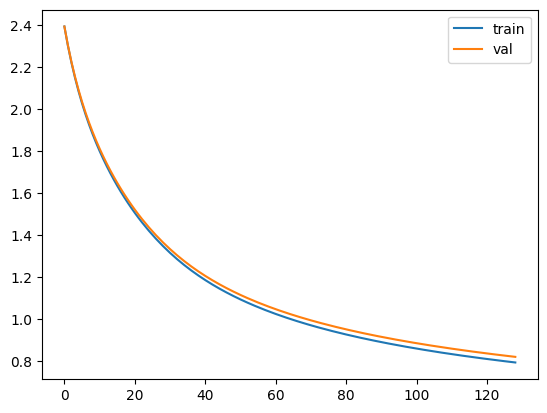

Accuracy: 0.7426666666666667


In [27]:


fashion_mnist = NN(784, 160, 10, 0.03, 130)
p = np.random.permutation(len(X))
X, y = X[p], y[p]

# Splitting the data into training, validation and testing in the ratio 70:20:10
X_train, y_train = X[:int(0.7*len(X))], y[:int(0.7*len(X))]
X_val, y_val = X[int(0.7*len(X)):int(0.9*len(X))], y[int(0.7*len(X)):int(0.9*len(X))]
X_test, y_test = X[int(0.9*len(X)):], y[int(0.9*len(X)):]

# Training the model
train_loss,val_loss = fashion_mnist.fit(X_train, y_train,X_val,y_val)


# Plotting the loss
plt.plot(train_loss,label='train')
plt.plot(val_loss,label='val')
plt.legend()
plt.show()

y_pred = fashion_mnist.predict(X_test)

# [Q18] Why are we using argmax here? Why is this output different from the output of the model?
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)
print(f"Accuracy: {np.mean(y_pred == y_test)}")

In [ ]:
print(f"Accuracy: {np.mean(y_pred == y_test)}")